# Nearest neighbour


## Preprocessing

In [82]:
#Loading the libraries and setting the theme to seaborn
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import datetime
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

In [83]:
#Reading the csv file and saving it in a dataframe
df= pd.read_csv("C:/Users/tonid/OneDrive/Dokumente/SEMESTER 4/Group project/modeling/January_Schiphol_Time_Groups.csv")
df

,Unnamed: 0,Station_Code,Station_Name,Train_Number,Train_Type,Train_Company,Train_Destination_Planned,Train_Destination_Actual,Train_Departure_Planned,Train_Departure_Actual,Train_Delay,MaxNumberOfStops,weekday,day_of_week,Train_Departure_Planned_Time,Time_Group
0,0,HRL,Heerlen,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:44:00,2016-01-01 06:44:00,0.0,10,4,Friday,64400,Morning_Rush_Hour
1,1,EHV,Eindhoven,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:48:00,2016-01-01 06:48:00,0.0,10,4,Friday,64800,Morning_Rush_Hour
2,2,STD,Sittard,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:00:00,2016-01-01 07:00:00,0.0,10,4,Friday,70000,Morning_Rush_Hour
3,3,DV,Deventer,1624,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:02:00,2016-01-01 07:02:00,0.0,10,4,Friday,70200,Morning_Rush_Hour
4,4,HT,'s-Hertogenbosch,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:09:00,2016-01-01 07:09:00,0.0,10,4,Friday,70900,Morning_Rush_Hour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76310,76310,HVS,Hilversum,1684,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 22:53:00,2016-01-31 22:53:00,0.0,13,6,Sunday,225300,Night
76311,76311,AMF,Amersfoort,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:10:00,2016-01-31 23:10:00,0.0,6,6,Sunday,231000,Night
76312,76312,DVD,Duivendrecht,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:40:00,2016-01-31 23:40:00,0.0,6,6,Sunday,234000,Night
76313,76313,ASDZ,Amsterdam Zuid,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:46:00,2016-01-31 23:46:00,0.0,6,6,Sunday,234600,Night


In [84]:
#make dummies from the different station names so i can use it for the k nearest neighbour 
StationDummies=pd.get_dummies(df['Station_Name'])
StationDummies

,'s-Hertogenbosch,Almelo,Almere Centrum,Amersfoort,Amersfoort Schothorst,Amsterdam Bijlmer ArenA,Amsterdam RAI,Amsterdam Zuid,Apeldoorn,Apeldoorn Osseveld,...,Schiphol Airport,Sittard,Twello,Utrecht Centraal,Utrecht Overvecht,Veenendaal-De Klomp,Weert,Wierden,Wolfheze,Zaltbommel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76311,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76313,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
#make dummies for the days of the week
DayDummies=pd.get_dummies(df['day_of_week'])
DayDummies

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
76310,0,0,0,1,0,0,0
76311,0,0,0,1,0,0,0
76312,0,0,0,1,0,0,0
76313,0,0,0,1,0,0,0


In [86]:
#make dummies for the time groups 
TimeDummies=pd.get_dummies(df['Time_Group'])
TimeDummies

,Afternoon_Rush_hour,Between_Rush_hours,Early_Morning,Morning_Rush_Hour,Night
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
76310,0,0,0,0,1
76311,0,0,0,0,1
76312,0,0,0,0,1
76313,0,0,0,0,1


In [87]:
# make dummies for the train types
TrainDummies=pd.get_dummies(df['Train_Type'])
TrainDummies

,Extra trein,Intercity,Sprinter
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
76310,0,1,0
76311,0,1,0
76312,0,1,0
76313,0,1,0


In [88]:
#then add all those dataframes with the dummies to the dataset
FinalDF=pd.concat([df, StationDummies, DayDummies, TimeDummies, TrainDummies], axis=1)
FinalDF


,Unnamed: 0,Station_Code,Station_Name,Train_Number,Train_Type,Train_Company,Train_Destination_Planned,Train_Destination_Actual,Train_Departure_Planned,Train_Departure_Actual,...,Tuesday,Wednesday,Afternoon_Rush_hour,Between_Rush_hours,Early_Morning,Morning_Rush_Hour,Night,Extra trein,Intercity,Sprinter
0,0,HRL,Heerlen,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:44:00,2016-01-01 06:44:00,...,0,0,0,0,0,1,0,0,1,0
1,1,EHV,Eindhoven,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:48:00,2016-01-01 06:48:00,...,0,0,0,0,0,1,0,0,1,0
2,2,STD,Sittard,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:00:00,2016-01-01 07:00:00,...,0,0,0,0,0,1,0,0,1,0
3,3,DV,Deventer,1624,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:02:00,2016-01-01 07:02:00,...,0,0,0,0,0,1,0,0,1,0
4,4,HT,'s-Hertogenbosch,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:09:00,2016-01-01 07:09:00,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76310,76310,HVS,Hilversum,1684,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 22:53:00,2016-01-31 22:53:00,...,0,0,0,0,0,0,1,0,1,0
76311,76311,AMF,Amersfoort,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:10:00,2016-01-31 23:10:00,...,0,0,0,0,0,0,1,0,1,0
76312,76312,DVD,Duivendrecht,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:40:00,2016-01-31 23:40:00,...,0,0,0,0,0,0,1,0,1,0
76313,76313,ASDZ,Amsterdam Zuid,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:46:00,2016-01-31 23:46:00,...,0,0,0,0,0,0,1,0,1,0


In [89]:
# and then last but not least i add the group if there is a train delay 
FinalDF['DelayOrNot'] = np.where(FinalDF['Train_Delay']<=0, 0, 1).astype(int)
FinalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76315 entries, 0 to 76314
Data columns (total 72 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    76315 non-null  int64  
 1   Station_Code                  76315 non-null  object 
 2   Station_Name                  76315 non-null  object 
 3   Train_Number                  76315 non-null  int64  
 4   Train_Type                    76315 non-null  object 
 5   Train_Company                 76315 non-null  object 
 6   Train_Destination_Planned     76315 non-null  object 
 7   Train_Destination_Actual      76315 non-null  object 
 8   Train_Departure_Planned       76315 non-null  object 
 9   Train_Departure_Actual        76315 non-null  object 
 10  Train_Delay                   76315 non-null  float64
 11  MaxNumberOfStops              76315 non-null  int64  
 12  weekday                       76315 non-null  int64  
 13  d

In [90]:
FinalDF.head()

,Unnamed: 0,Station_Code,Station_Name,Train_Number,Train_Type,Train_Company,Train_Destination_Planned,Train_Destination_Actual,Train_Departure_Planned,Train_Departure_Actual,...,Wednesday,Afternoon_Rush_hour,Between_Rush_hours,Early_Morning,Morning_Rush_Hour,Night,Extra trein,Intercity,Sprinter,DelayOrNot
0,0,HRL,Heerlen,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:44:00,2016-01-01 06:44:00,...,0,0,0,0,1,0,0,1,0,0
1,1,EHV,Eindhoven,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:48:00,2016-01-01 06:48:00,...,0,0,0,0,1,0,0,1,0,0
2,2,STD,Sittard,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:00:00,2016-01-01 07:00:00,...,0,0,0,0,1,0,0,1,0,0
3,3,DV,Deventer,1624,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:02:00,2016-01-01 07:02:00,...,0,0,0,0,1,0,0,1,0,0
4,4,HT,'s-Hertogenbosch,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:09:00,2016-01-01 07:09:00,...,0,0,0,0,1,0,0,1,0,0


## Data understanding

In [91]:
# Lets take a look into our target variable.
df_target = pd.DataFrame(FinalDF.DelayOrNot, columns=['DelayOrNot'])
df_target['DelayOrNot'].value_counts()

0    51455
1    24860
Name: DelayOrNot, dtype: int64

In [92]:
# We separate majority and minority classes
from sklearn.utils import resample
train_majority = FinalDF[FinalDF.DelayOrNot == 0] #0 is no delay
train_minority = FinalDF[FinalDF.DelayOrNot == 1] # 1 is delay 

# Then downsample majority class
train_majority_downsampled = resample(
    train_majority,
    replace=True,  # sample with replacement
    n_samples=24860,  # to match majority class
    random_state=123)  # reproducible results

# Finally we combine majority class with upsampled minority class
train_downsampled = pd.concat([train_minority, train_majority_downsampled])
# Display new class counts to check the result
train_downsampled.DelayOrNot.value_counts()

1    24860
0    24860
Name: DelayOrNot, dtype: int64

In [93]:
train_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49720 entries, 34 to 54495
Data columns (total 72 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    49720 non-null  int64  
 1   Station_Code                  49720 non-null  object 
 2   Station_Name                  49720 non-null  object 
 3   Train_Number                  49720 non-null  int64  
 4   Train_Type                    49720 non-null  object 
 5   Train_Company                 49720 non-null  object 
 6   Train_Destination_Planned     49720 non-null  object 
 7   Train_Destination_Actual      49720 non-null  object 
 8   Train_Departure_Planned       49720 non-null  object 
 9   Train_Departure_Actual        49720 non-null  object 
 10  Train_Delay                   49720 non-null  float64
 11  MaxNumberOfStops              49720 non-null  int64  
 12  weekday                       49720 non-null  int64  
 13  

* The data contains records of  449720 train rides. There is numerical, also some presented by characters(object type data). 

Text(0.5, 1.0, 'Cases devision between trains with and without delay ')

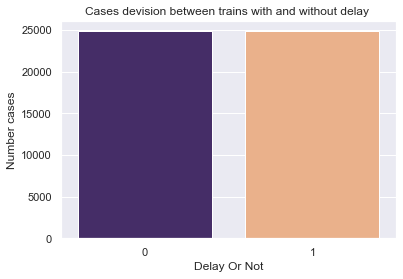

In [94]:
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns

plot = sns.countplot(train_downsampled['DelayOrNot'],
                     palette=['#432371', "#FAAE7B"])
plt.xlabel('Delay Or Not')
plt.ylabel('Number cases')
plt.title('Cases devision between trains with and without delay ')

## Predictions

* We want to predict whether there is or there is no delay. We will use classification algorithm to do so.We are beginning with splitting the data to 70% train data and 30% test data. We will be able to check what would happen if the model is faced with data, it has not worked with before.

In [95]:
# Loading necessary libraries
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold

### Features selection

In [96]:
#then i import the function to split train and test data, select the y and x features and split the data into test and train data
from sklearn.model_selection import train_test_split

train_X = train_downsampled.iloc[:, [11, 16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70]]
train_y = train_downsampled['DelayOrNot']



In [97]:
# We need to scale the data when using KNN algorithm.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_X)
train_X = scaler.transform(train_X)

### Separating data into train and test set

In [98]:
X_train_train, X_test_train, y_train_train, y_test_train = train_test_split(train_X, train_y, test_size=0.3, random_state = 42)
train_X

array([[ 0.48112699, -0.20166334, -0.15118151, ..., -0.01098592,
         0.0767283 , -0.07592856],
       [ 0.48112699, -0.20166334, -0.15118151, ..., -0.01098592,
         0.0767283 , -0.07592856],
       [ 0.48112699, -0.20166334, -0.15118151, ..., -0.01098592,
         0.0767283 , -0.07592856],
       ...,
       [ 0.48112699, -0.20166334, -0.15118151, ..., -0.01098592,
         0.0767283 , -0.07592856],
       [-0.52175038, -0.20166334, -0.15118151, ..., -0.01098592,
         0.0767283 , -0.07592856],
       [ 1.48400436, -0.20166334, -0.15118151, ..., -0.01098592,
         0.0767283 , -0.07592856]])

# Modeling

### K Neighrest neighbour

* We will train a model with Kneighbours classifier in the next step. 

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Initialize KNN Classifier
knc_train = KNeighborsClassifier(n_neighbors=31) # n_neighbors=31 bc its the best k-value

k_range = list(range(1, 50))
param_grid = dict(n_neighbors=k_range)

In [100]:
# Initialize grid search
knc_model = GridSearchCV(knc_train, param_grid, cv=10)

knc_model.fit(X_train_train, y_train_train)
knc_model

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=31),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [101]:
print("The best K-value to use for K nearest neighbours:", knc_model.best_params_)

The best K-value to use for K nearest neighbours: {'n_neighbors': 41}


## Finding best parameters 

In [102]:
# try K=1 through K=30 and record testing accuracy
k_range = list(range(1, 35)) # the range of k values that we wil run knn on
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_train, y_train_train)
    y_pred = knn.predict( X_test_train)
    scores.append(metrics.accuracy_score(y_test_train, y_pred))

Text(0, 0.5, 'Testing Accuracy')

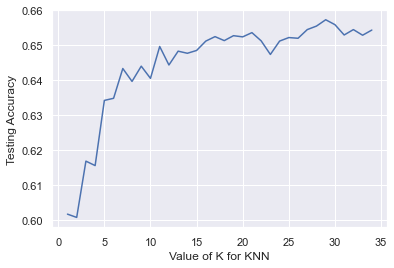

In [103]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
# allow plots to appear within the notebook
%matplotlib inline
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

* The accuracy is best when the k values are between 18-20 or around 26-27.We will try the model with those k values.  

In [104]:
# Initialize grid search
knc_model1  =KNeighborsClassifier(n_neighbors=19)

knc_model1.fit(X_train_train, y_train_train)
knc_model1

KNeighborsClassifier(n_neighbors=19)

In [105]:
#here i iimport metrics and accuracy score
from sklearn import metrics
from sklearn.metrics import accuracy_score
#and give the accuracy score for this model
y_pred = knc_model1.predict(X_test_train)
accuracy_score(y_test_train, y_pred)

0.6527219093590775

* Using the best parameter of n_neighbours = 19 , the model accuracy is 0.656. We will use this model to implemetn grid search. 

## Evaluation

In [106]:
#here i iimport metrics and accuracy score
from sklearn import metrics
from sklearn.metrics import accuracy_score
#and give the accuracy score for this model
y_pred = knc_model.predict(X_test_train)
accuracy_score(y_test_train, y_pred)

0.6538616251005631

###  We can see that the accuracy that we got for the model is around 65 percent. 

In [107]:
#here i import the classification report
from sklearn.metrics import classification_report
#here i print the classification report
target_names = ['class 1', 'class 2']
print(classification_report(y_test_train, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.66      0.64      0.65      7469
     class 2       0.65      0.67      0.66      7447

    accuracy                           0.65     14916
   macro avg       0.65      0.65      0.65     14916
weighted avg       0.65      0.65      0.65     14916



#### According to the classification report we can see that for no delays the precision score is lower that for delays. Class 1 has 66 % precision which means that 66 % of the cases is actually this class and 34% is false positives. Recall is 64 % which means the model predicts 64% of the cases corectly. The precision of class 2 - delays is 65 %. That means that in 65 % of the cases is actually that class and in 35 % the model misclassifies the data. The recall is higher compared to class 1 with score of 67 %. That means that the model classifies corectly 67% of the cases. The overall accuracy of the model is 65 percent. 

In [108]:
#here i import the cross validation score
from sklearn.model_selection import cross_val_score
#and then firstly print the seperate scores and also the mean overall score
print(cross_val_score(knc_model, train_X, train_y, cv=5))
print(cross_val_score(knc_model, train_X, train_y, cv=5).mean())

[0.63032985 0.6269107  0.62148029 0.6269107  0.61665326]
0.6244569589702333


#### The cross validation that we get is a bit lower - 62 % than the model accuracy. It may be that it gives better indication of the model accuracy as it includes less overfitting. 

# Model evaluation 

Confusion Matrix:
 [[4756 2713]
 [2450 4997]]


Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65      7469
           1       0.65      0.67      0.66      7447

    accuracy                           0.65     14916
   macro avg       0.65      0.65      0.65     14916
weighted avg       0.65      0.65      0.65     14916



<AxesSubplot:>

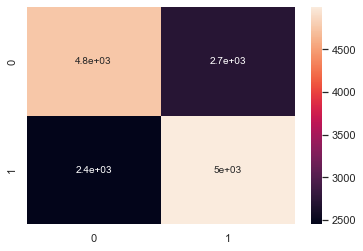

In [109]:
print("Confusion Matrix:\n", confusion_matrix(y_test_train, y_pred))
print("\n")
print("Classification Report:\n",classification_report(y_test_train, y_pred))
cm=confusion_matrix(y_test_train, y_pred)
sns.heatmap(cm, annot=True)

In our case recall is more important than precision. It is better to classify train with no delay as delay instead of no delay as delay. In case that the no delay train is classifed as delay the user will still get an estimation of the duration of the delay and probably use the train. 
In the confusion matrix we had 10 160 train in the test set. 
True positives: 4756 records of the train delay data were predicted correctly as delay by the model. 
False positives: 2713 records of the train delay data were wrongly predicted as train delay. 
False negatives: 2450 records of the train delay data were wrongly predicted as no delay. 
True negatives: 4997 records of the train delay data were predicted correctly as no delay.
The model has 65 % of accuracy. 

# Conclusion 

*The best result we get is accuracy of 65 percent. I would not say that the model is reliable for predicting the train delay. It could serve as a base to improve upon considering future implementation. 